# CIFAR Images classification using CNN

CIFAR-10 的全名是 ``Canadian Institute for Advanced Research``。  
它是深度學習的大神 Geoffrey Hinton 以及 Alex Krizhevsky 和 Vinod Nair 共同創建出來的。  

CIFAR-10 是個知名的資料集，其包含了 60,000 張彩色 $32\times32$ 的圖片。  
圖片集共分成 10 個類別，每種類別有 6,000 張照片。  
其中 50,000 張做為訓練集，10,000 做為測試集。

這 10 類的類別為 飛機、汽車、鳥、貓、鹿、狗、青蛙、馬、船、卡車。

![](https://img-blog.csdn.net/20180717104127164?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2JyeWFudF9tZW5n/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)

The CIFAR-10 dataset The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

For the details of the CIFAR-10 dataset, please refer to [here](https://www.cs.toronto.edu/~kriz/cifar.html).

## Load the dataset

CIFAR-10 已經直接包含在 Keras 的資料集中了，我們可以直接載入它。

We can directly load the CIFAR-10 dataset as it is included in the Keras.

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

## Observe the dataset

In [7]:
print(f'The shape of x_train is {x_train.shape}')
print(f'The shape of y_train is {y_train.shape}')

The shape of x_train is (50000, 32, 32, 3)
The shape of y_train is (50000, 1)


x_train contains 50000 $32 \times 32$ colorful images.  

3 means 3 channels (i.g., R, G and B).

## Show the images in the dataset

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns

C:\Users\justi\anaconda3\envs\MLCourse\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\justi\anaconda3\envs\MLCourse\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [20]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Each image is a $32 \times 32$ colorful (i.e., 3 channels) picture.

![](cnn_channels.png)

Show the first image of x_train.

It is a frog. 

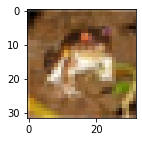

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

Print the lable of x_train[0]. 

In [70]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
i_img = 1 
print(y_train[i_img])
v = y_train[i_img][0]
print(f'The class of x_train[{i_img}] is a {labelNames[v]}')

[9]
The class of x_train[1] is a truck


## Normalization of the dataset

In [22]:
x_train1 = x_train.astype('float32') #cast to float32 datatype
x_test1 = x_test.astype('float32') #cast to float32 datatype
x_train1 = x_train1/255
x_test1 = x_test1/255

## Conver a label to a probability vector

In [24]:
from tensorflow.keras.utils import to_categorical

y_train1 = to_categorical(y_train, 10)
y_test1 = to_categorical(y_test, 10)

In [25]:
print(y_train1[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Construct the CNN

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout

#the shape of each image
INPUT_IMG_SHAPE = (32, 32, 3)
CLASSES = 10

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=INPUT_IMG_SHAPE,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(CLASSES,activation = 'softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)             

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
h = model.fit(x_train1, y_train1, batch_size=128, epochs=20, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 39s 982us/sample - loss: 1.5400 - accuracy: 0.4466 - val_loss: 1.2501 - val_accuracy: 0.5679
Epoch 2/20
40000/40000 [==============================] - 37s 934us/sample - loss: 1.1195 - accuracy: 0.6052 - val_loss: 1.0636 - val_accuracy: 0.6299
Epoch 3/20
40000/40000 [==============================] - 37s 922us/sample - loss: 0.9617 - accuracy: 0.6618 - val_loss: 0.9965 - val_accuracy: 0.6555
Epoch 4/20
40000/40000 [==============================] - 36s 909us/sample - loss: 0.8586 - accuracy: 0.6984 - val_loss: 0.9440 - val_accuracy: 0.6743
Epoch 5/20
40000/40000 [==============================] - 37s 916us/sample - loss: 0.7739 - accuracy: 0.7297 - val_loss: 0.8957 - val_accuracy: 0.6906
Epoch 6/20
40000/40000 [==============================] - 39s 968us/sample - loss: 0.6881 - accuracy: 0.7588 - val_loss: 0.9085 - val_accuracy: 0.6953
Epoch 7/20
40000/40000 [====================

In [62]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,1.540032,0.446550,1.250066,0.5679
1,1.119461,0.605225,1.063607,0.6299
2,0.961661,0.661750,0.996532,0.6555
3,0.858568,0.698350,0.944023,0.6743
4,0.773929,0.729700,0.895690,0.6906


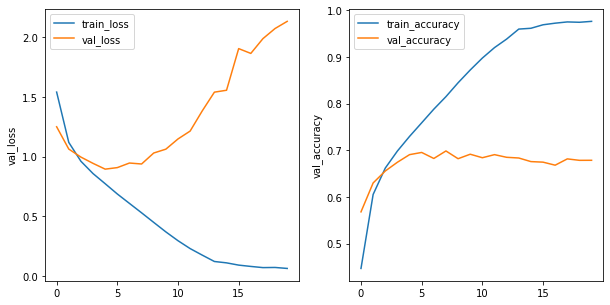

In [63]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(20), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(20), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(20), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(20), y=dfResult.val_accuracy, label='val_accuracy')

In [64]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')

The best val_accuracy is: 0.6984999775886536


## The best result on CIFAR-10

Check [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130) to see the leaderboard of the training results on CIFAR-10.

![](https://i.imgur.com/AVCUycV.png)